# Deep Learning: Progetto Portfolio

In questo progetto portfolio si analizzerà un sottoinsieme del [dataset LendingClub di Kaggle](https://www.kaggle.com/wordsforthewise/lending-club). In particolare in questo caso si utilizzerà un modello di Deep Learning per svolgere il compito di prevedere se un borrower restituirà o meno il prestito a partire da dati di prestiti passati.

## Importare librerie 

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Ottenere i dati

Per prima cosa si caricano e visualizzano le descrizioni delle colonne del dataset.

In [4]:
loan_info = pd.read_csv('../DATA/lending_club_info.csv')

In [5]:
loan_info.set_index('LoanStatNew',inplace=True)

In [6]:
loan_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [7]:
# visualizzo per intero le descrizioni
for i in loan_info.index:
    s = loan_info.loc[i]
    print(i,':',s[0])
    print('\n')

loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


term : The number of payments on the loan. Values are in months and can be either 36 or 60.


int_rate : Interest Rate on the loan


installment : The monthly payment owed by the borrower if the loan originates.


grade : LC assigned loan grade


sub_grade : LC assigned loan subgrade


emp_title : The job title supplied by the Borrower when applying for the loan.*


emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


annual_inc : The self-reported annual income provided by the borrower during registration.


verification_status : Indicates if i

Si passa a caricare il dataset vero e proprio.

In [8]:
loan = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

**Sono presenti dei Missing Data, sarà necessario un po' di feature engineering sul dataset.**

In [10]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [11]:
loan.describe().transpose() # traspongo per una più facile leggibilità dell'analisi preliminare

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


# EDA

Si analizza la colonna target per verificarne le diciture e se sia bilanciata o meno.

In [12]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

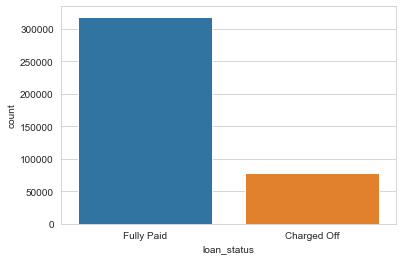

In [13]:
sns.countplot(data=loan,x='loan_status') 

**Il dataset è abbastanza sbilanciato dalla parte dei prestiti ripagati, teniamolo a mente per le performance del modello.**

Si indagano possibili cause/correlazioni fra le feature e la colonna target.

Per prima cosa si analizza la distribuzione dell'ammontare dei prestiti distinguendo i casi in cui è stato ripagato e non. 

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

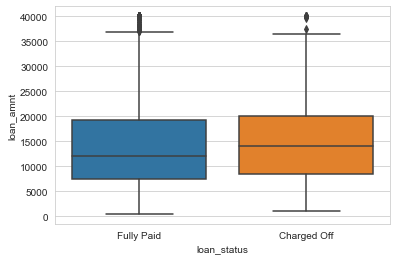

In [14]:
sns.boxplot(x='loan_status',y='loan_amnt',data=loan)

**Il picco della distribuzione per la categoria "Fully Paid" è situato attorno ai 12_000 dollari, mentre quello per "Charged Off" è leggermente più alto attorno ai 14_000 dollari. Questa differenza è comprensibile dato che, in generale, un prestito più alto è più difficile da risanare. Il resto della distribuzione è paragonabile nei due casi. Cerchiamo di quantificare meglio quanto appena detto.**

In [15]:
loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Le mediane delle distribuzioni sono proprio nei valori previsti visivamente, inoltre le medie confermano quest'andamento. Anche le deviazioni standard con valori simili fra loro convalidano la somiglianza del resto della distribuzione.**

Si prosegue con l'indagine della correlazione fra la categoria target 'loan_status' e le categorie attribuite al borrower da LendingClub (scala in ordine alfanumerico crescente dal migliore al peggiore: A1 -> G5).

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

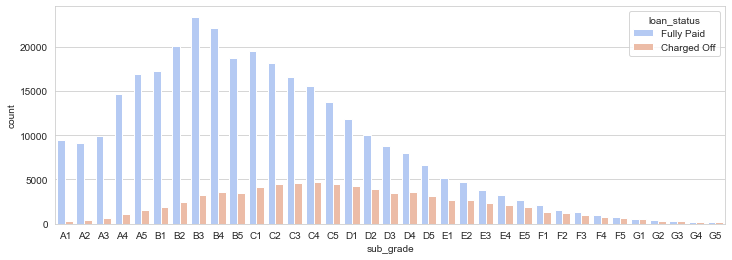

In [16]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(loan['sub_grade'].unique()) # ordino le categorie dalla migliore alla peggiore
sns.countplot(x='sub_grade',data=loan,order = subgrade_order,palette='coolwarm',hue='loan_status')

**Come ci suggeriscono le due distribuzioni messe in parallelo, più si va nelle categorie peggiori e più il rapporto prestito risanato e non diminuisce. Analizzo nel dettaglio la coda delle distribuzioni.**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

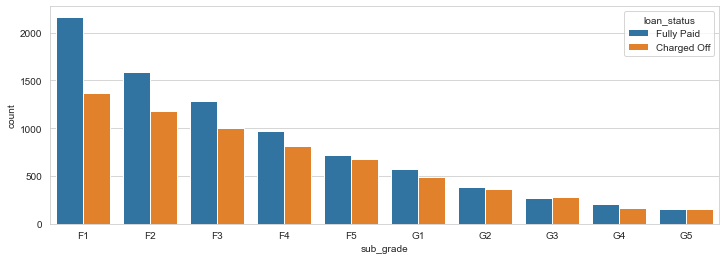

In [17]:
f_and_g = loan[(loan['grade']=='G') | (loan['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

**Come facilmente intuito, nelle ultime categorie i prestiti ripagati e non sono equiparabili in numero. Questo ne conferma il grande rischio per i loaner.**

Si sostituiscono le diciture "Charged Off" e "Fully Paid", rispettivamente, con un più "machine learning friendly" 0 e 1.

In [18]:
loan['loan_status'].replace(to_replace=['Fully Paid','Charged Off'],value=[1,0],inplace=True)

SI visualizza il grado di correlazione fra le feature numeriche del dataset e la colonna target "loan_status".

<AxesSubplot:>

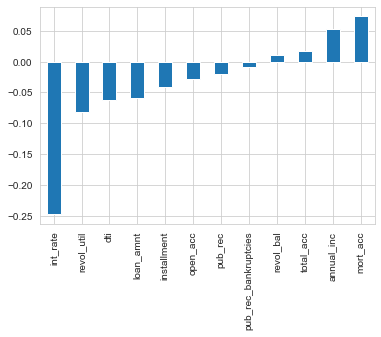

In [19]:
loan.corr()['loan_status'].sort_values()[:-1].plot(kind='bar')

**La feature 'int_rate' è inversamente correlata al pagamento del prestito, infatti, come è intuibile che sia, maggiore è il tasso di interesse del debito e più difficilmente si riesce a sanarlo.**

**Inoltre, dall'altra parte del plot, maggiore è il salario annuale e il numero di ipoteche fatte e più è probabile che il prestito venga ripagato. Sebbene la correlazione sia molto leggera è comunque intuitiva.**

Si visualizzano le correlazioni in generale lungo il dataset intero con una heatmap.

<AxesSubplot:>

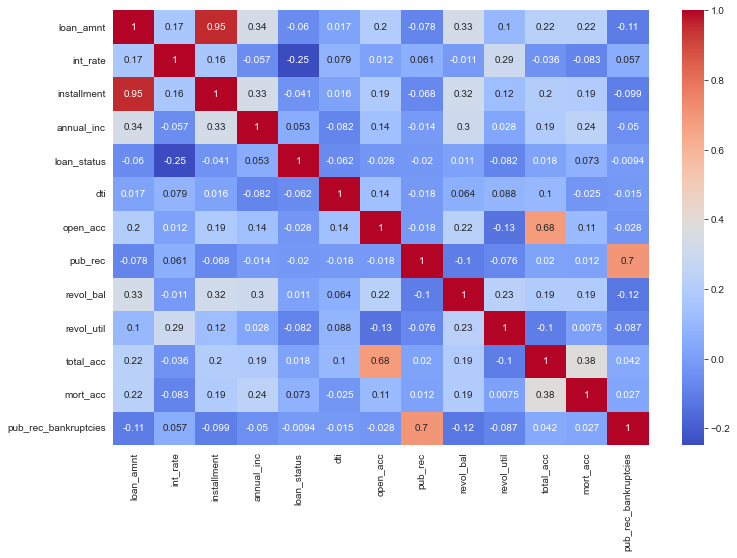

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(loan.corr(),cmap='coolwarm',annot=True)

**Le correlazioni sono parecchie e le più evidenti sono banali, come quella fra numero di carte di credito attive 'open_acc' e totali 'total_acc' di un borrower. Analizzo un po' più nel dettaglio quella fra il corrispettivo mensile da pagare per il risanamento del debito 'installment' e l'ammontare del prestito totale 'loan_amnt' che ha una correlazione quasi pari alla perfezione.**

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

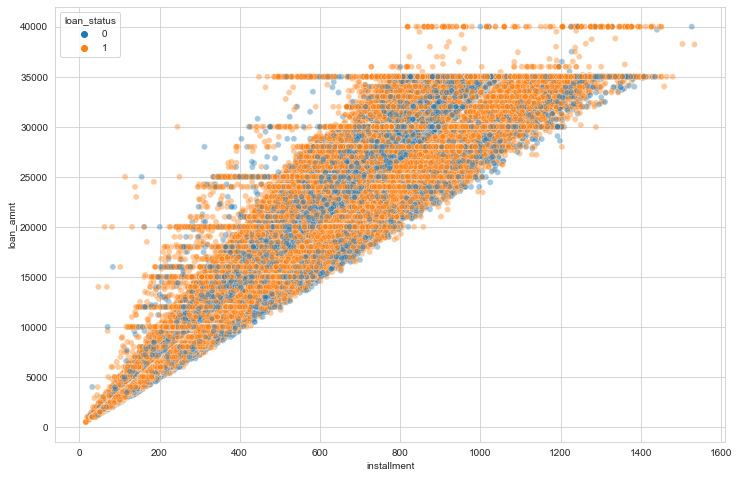

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=loan,x='installment',y='loan_amnt',hue='loan_status',alpha=0.4)

Si fa un fit lineare dello scatterplot qui sopra.

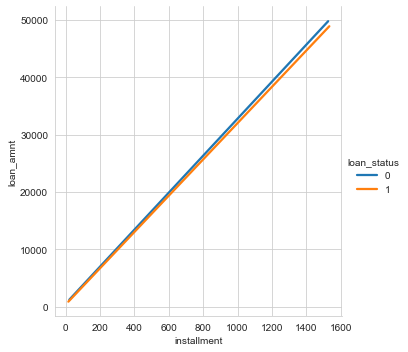

In [22]:
sns.lmplot(data=loan,x='installment',y='loan_amnt',hue='loan_status',scatter=False)

**Banalmente, c'è una diretta proporzionalità tra l'ammontare da restituire mensilmente e il prestito totale da restituire. Dal valore della correlazione visto in precedenza si capisce che Lending Club usava, in prima approssimazione, una relazione lineare per calcolare una quantità dall'altra una volta che il prestito è stato concesso.**

## Missing Data

In questa sezione si tratteranno i Missing Data del dataset, scartando quelli troppo complessi da recuperare e inferendo gli altri da un fit o da altre feature.

Per prima cosa si analizza il peso nel dataset dei diversi tipi di Missing Data.

In [23]:
loan.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

Calcolo il peso dei Missing Data, in percentuale, nella feature corrispondente.

In [24]:
100*(loan.isnull().sum()/len(loan))

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

Si affrontano per ordine decrescente di importanza nel dataset.

### Mort Acc

La feature 'mort_acc' che presenta il maggior numero di Missing Data ha la maggior correlazione con 'total_acc', pari a 0.38, non eccellente ma neanche da trascurare.

<Figure size 864x576 with 0 Axes>

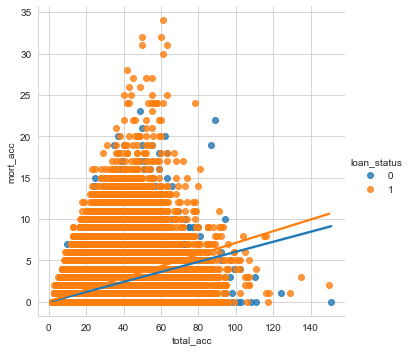

In [25]:
plt.figure(figsize=(12,8))
sns.lmplot(data=loan,x='total_acc',y='mort_acc',hue='loan_status')

L'idea è quella di calcolare per ogni valore di 'total_acc' il valore medio per 'mort_acc', e successivamente cercare le righe con un valore NaN di 'mort_acc' e, a seconda del 'total_acc' che si ha, sostituire con la media di 'mort_acc' corrispondente.

In [26]:
total_acc_avg = loan.groupby('total_acc').mean()['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [27]:
def fill_mort_acc(total_acc,mort_acc):
    
    """
    Prende in input i valori di total_acc e mort_acc di una determinata riga del dataset.
    Se il valore di mort_acc è NaN lo sostituisce con il valore medio che corrisponde al 
    total_acc che si ha. Altrimenti si prosegue con il valore che si ha.
    """
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

Si applica la funzione di riempimento dei NaN di 'mort_acc' al dataset.

In [28]:
loan['mort_acc'] = loan.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

Si verifica che non ci siano più Missing Data per la colonna 'mort_acc'.

In [29]:
loan.isnull().sum() 

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
dtype: int64

**Abbiamo "riempito" i valori NaN di 'mort_acc' con un senso logico.**

### Emp Title

Si potrebbe pensare di fare un one-hot encoding, contiamo il numero di titoli lavorativi unici.

In [30]:
loan['emp_title'].nunique() 

173105

**Sono di tipo stringa e 173_105 valori unici su 396_030 righe del dataset, ovvero un'enormità per farci un one-hot encoding. Per essere utilizzabili bisognerebbe sapere se per caso i NaN significhino "disoccupato" o meno, ma ciò è improbabile. La scelta più rapida e indolore è scartare la feature.**

In [31]:
loan.drop('emp_title',axis=1,inplace=True) 

In [32]:
loan.isnull().sum() 

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
dtype: int64

### Emp Length

Anche qua il one-hot encoding potrebbe essere una via percorribile, soprattutto perchè i valori sono solo 11.

In [33]:
loan['emp_length'].nunique()

11

**Verifichiamo che ne valga la pena, analizzando la correlazione con 'loan_status'.**

In [34]:
# per ordine mentale ordino in ordine crescente di anni lavorativi il prossimo plot
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

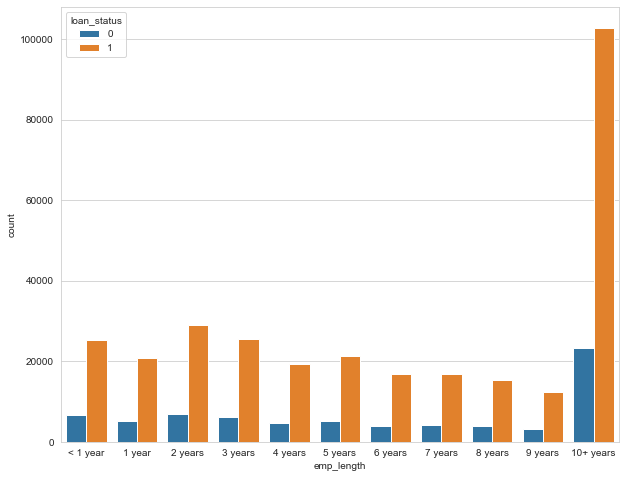

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(data=loan,x='emp_length',order=emp_length_order,hue='loan_status') 

**Questo grafico non basta a dare informazioni importanti sulla relazione con la colonna target, visualizziamo le percentuali relative di prestiti pagati e non per ciascuna categoria di 'emp_length'.**

In [36]:
emp_co = loan[loan['loan_status']==0].groupby('emp_length').count()['loan_status']
emp_fp = loan[loan['loan_status']==1].groupby('emp_length').count()['loan_status']

emp_len = emp_co/emp_fp

<AxesSubplot:xlabel='emp_length'>

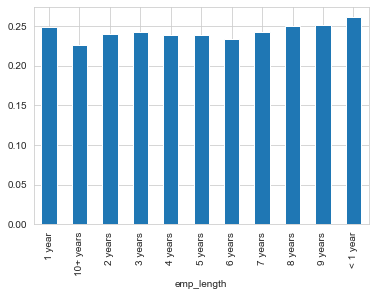

In [37]:
emp_len.plot(kind='bar') 

**Non ci sono differenze sostanziali fra le diverse categorie di 'emp_length', non è una feature utile la scarto direttamente.**

In [38]:
loan.drop('emp_length',axis=1,inplace=True) 

In [39]:
loan.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                   1755
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util               276
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                   0
pub_rec_bankruptcies     535
address                    0
dtype: int64

### Title

Per la feature 'title' che è la motivazione per la quale viene richiesto il prestito, bisogna notare che esiste un'altra feature nel dataset, senza Missing Data, che svolge lo stesso compito ovvero 'purpose'.

In [40]:
loan['title'].head(20)

0                    Vacation
1          Debt consolidation
2     Credit card refinancing
3     Credit card refinancing
4       Credit Card Refinance
5          Debt consolidation
6            Home improvement
7        No More Credit Cards
8          Debt consolidation
9          Debt Consolidation
10         Debt Consolidation
11    Credit card refinancing
12         Debt consolidation
13         Debt consolidation
14                   Business
15             Major purchase
16         Debt consolidation
17         Debt consolidation
18         Debt consolidation
19         Debt consolidation
Name: title, dtype: object

In [41]:
loan['purpose'].head(20)

0               vacation
1     debt_consolidation
2            credit_card
3            credit_card
4            credit_card
5     debt_consolidation
6       home_improvement
7            credit_card
8     debt_consolidation
9     debt_consolidation
10    debt_consolidation
11           credit_card
12    debt_consolidation
13    debt_consolidation
14        small_business
15        major_purchase
16    debt_consolidation
17    debt_consolidation
18    debt_consolidation
19    debt_consolidation
Name: purpose, dtype: object

**Danno la stessa identica informazione, scarto la feature con i Missing Data.**

In [42]:
loan.drop('title',axis=1,inplace=True) 

In [43]:
loan.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

### Pub_Rec_Bankruptcies

Nonostante i Missing Data siano pochi si può replicare quanto fatto con la feature 'mort_acc' per recuperarli, perché si ha una forte correlazione con un'altra feature 'pub_rec'.

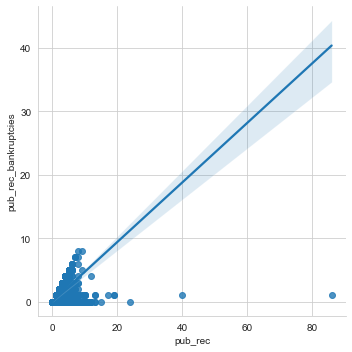

In [44]:
reg = sns.lmplot(data=loan,x='pub_rec',y='pub_rec_bankruptcies')

In [45]:
pub_bankrupt_avg = loan.groupby('pub_rec').mean()['pub_rec_bankruptcies']
pub_bankrupt_avg

pub_rec
0.0     0.000000
1.0     0.810205
2.0     0.929863
3.0     1.074293
4.0     1.136622
5.0     1.113924
6.0     0.983607
7.0     0.821429
8.0     1.235294
9.0     1.250000
10.0    0.363636
11.0    0.000000
12.0    1.000000
13.0    0.500000
15.0    0.000000
17.0    1.000000
19.0    1.000000
24.0    0.000000
40.0    1.000000
86.0    1.000000
Name: pub_rec_bankruptcies, dtype: float64

In [46]:
def fill_pub_rec_bankrupt(pub_rec,pub_rec_bankruptcies):

    if np.isnan(pub_rec_bankruptcies):
        return pub_bankrupt_avg[pub_rec]
    else:
        return pub_rec_bankruptcies

In [47]:
loan['pub_rec_bankruptcies'] = loan.apply(lambda x: fill_pub_rec_bankrupt(x['pub_rec'], x['pub_rec_bankruptcies']), axis=1)

In [48]:
loan.isnull().sum() 

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies      0
address                   0
dtype: int64

**Ho "riempito" con senso la feature 'pub_rec_bankruptcies'.** 

### Revol_Util

In questo caso la situazione è simile alla feature precedente, ma non ha forti correlazioni con altre feature. Per semplicità si scarta.

In [49]:
loan.drop('revol_util',axis=1,inplace=True) 

In [50]:
loan.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

**Il dataset è stato ripulito con senso logico da tutti i Missing Data, ora è il momento di passare a trasformare le feature in un formato accettabile per modelli di machine learning.**

## Feature Engineering

In [51]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  int64  
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  object 
 14  open_acc              396030 non-null  float64
 15  

### Term

In [52]:
loan['term'].unique() 

array([' 36 months', ' 60 months'], dtype=object)

**Sono solo due possibili valori, faccio one-hot encoding.**

In [53]:
term = pd.get_dummies(loan['term'],drop_first=True)

In [54]:
loan = pd.concat([loan,term],axis=1)

In [55]:
loan.drop('term',axis=1,inplace=True) # non mi serve più

### Grades e Subgrades

In [56]:
sorted(loan['grade'].unique()) 

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [57]:
sorted(loan['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

È possibile che l'ordinamento dei subgrades segua la stessa logica di quella dei grades e che le due distribuzioni si rispecchino.

<AxesSubplot:xlabel='grade', ylabel='count'>

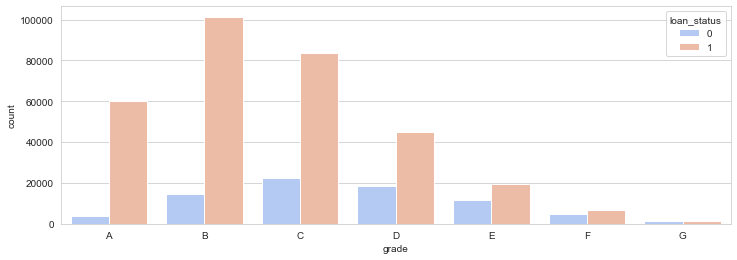

In [58]:
plt.figure(figsize=(12,4))
grade_order = sorted(loan['grade'].unique())
sns.countplot(x='grade',data=loan,order = grade_order,palette='coolwarm',hue='loan_status')

Si analizza il rapporto in percentuale tra prestiti non risanati ed estinti per ogni 'grade'. 

In [59]:
grade_co = loan[loan['loan_status']==0].groupby('grade').count()['loan_status']
grade_fp = loan[loan['loan_status']==1].groupby('grade').count()['loan_status']

grade_len = grade_co/grade_fp

<AxesSubplot:xlabel='grade'>

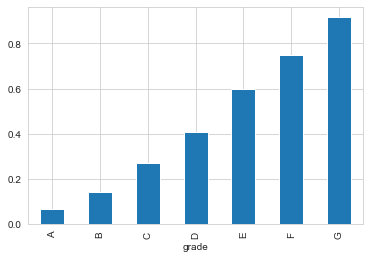

In [60]:
grade_len.plot(kind='bar')

**C'è un chiaro e intuibile andamento. Analizziamo le stesse cose per i 'sub_grade'.**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

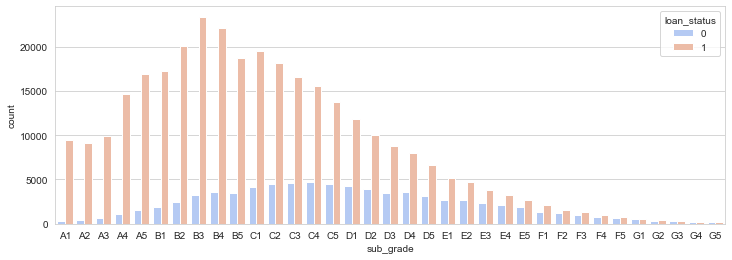

In [61]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(loan['sub_grade'].unique())
sns.countplot(x='sub_grade',data=loan,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

**Queste due distribuzioni sono molto simili a quelle per i 'grade', vediamo se anche per i rapporti percentuali si ha la stessa cosa.**

In [62]:
subgrade_co = loan[loan['loan_status']==0].groupby('sub_grade').count()['loan_status']
subgrade_fp = loan[loan['loan_status']==1].groupby('sub_grade').count()['loan_status']

subgrade_len = subgrade_co/subgrade_fp

<AxesSubplot:xlabel='sub_grade'>

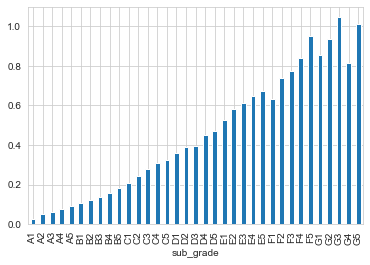

In [63]:
subgrade_len.plot(kind='bar') 

**È abbastanza confermato che la colonna 'sub_grade' contenga le stesse informazioni della 'grade'. Inoltre quest'ultima le fornisce meno dettagliatamente, perciò la scarto.**

In [64]:
loan.drop('grade',axis=1,inplace=True) 

Si fa il one-hot encoding della colonna 'sub_grade'.

In [65]:
grades = pd.get_dummies(loan['sub_grade'],drop_first=True)

In [66]:
loan = pd.concat([loan,grades],axis=1)

In [67]:
loan.drop('sub_grade',axis=1,inplace=True) # non serve più

### Home Ownership

In [68]:
loan['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

Le categorie 'NONE' ed 'ANY' possono essere inserite nella categoria 'OTHER'.

In [69]:
loan['home_ownership'] = loan['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

Si fa one-hot encoding di questa feature categorical.

In [70]:
home = pd.get_dummies(loan['home_ownership'],drop_first=True)

In [71]:
loan = pd.concat([loan,home],axis=1)

In [72]:
loan.drop('home_ownership',axis=1,inplace=True) # non serve più

### verification_status, application_type, initial_list_status, purpose

Per queste feature si passa subito al one-hot encoding.

In [73]:
dummies = pd.get_dummies(loan[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
loan = pd.concat([loan,dummies],axis=1)
loan = loan.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)

### issue_d

Questa feature è pericolosa per la buona riuscita del training del modello di Deep Learning, infatti contiene informazioni sul fatto che il prestito sia stato estinto o meno che è esattamente ciò che il modello si deve allenare a capire. Fornire questa feature al modello in fase di training è il cosiddetto **Data Leakage** e rovinerebbe le capacità predittive generali dell'algoritmo di machine learning. Si **deve** scartare.

In [74]:
loan.drop('issue_d',axis=1,inplace=True) 

### earliest_cr_line

La data di apertura della carta di credito più recente può essere indicativo dell'affidabilità del borrower, ma i valori sono troppi per un one-hot encoding a bruciapelo.

In [75]:
loan['earliest_cr_line'].nunique()

684

In [76]:
sorted(loan['earliest_cr_line'].unique())

['Apr-1955',
 'Apr-1958',
 'Apr-1960',
 'Apr-1961',
 'Apr-1962',
 'Apr-1963',
 'Apr-1964',
 'Apr-1965',
 'Apr-1966',
 'Apr-1967',
 'Apr-1968',
 'Apr-1969',
 'Apr-1970',
 'Apr-1971',
 'Apr-1972',
 'Apr-1973',
 'Apr-1974',
 'Apr-1975',
 'Apr-1976',
 'Apr-1977',
 'Apr-1978',
 'Apr-1979',
 'Apr-1980',
 'Apr-1981',
 'Apr-1982',
 'Apr-1983',
 'Apr-1984',
 'Apr-1985',
 'Apr-1986',
 'Apr-1987',
 'Apr-1988',
 'Apr-1989',
 'Apr-1990',
 'Apr-1991',
 'Apr-1992',
 'Apr-1993',
 'Apr-1994',
 'Apr-1995',
 'Apr-1996',
 'Apr-1997',
 'Apr-1998',
 'Apr-1999',
 'Apr-2000',
 'Apr-2001',
 'Apr-2002',
 'Apr-2003',
 'Apr-2004',
 'Apr-2005',
 'Apr-2006',
 'Apr-2007',
 'Apr-2008',
 'Apr-2009',
 'Apr-2010',
 'Apr-2011',
 'Apr-2012',
 'Apr-2013',
 'Aug-1951',
 'Aug-1958',
 'Aug-1959',
 'Aug-1960',
 'Aug-1961',
 'Aug-1962',
 'Aug-1963',
 'Aug-1964',
 'Aug-1965',
 'Aug-1966',
 'Aug-1967',
 'Aug-1968',
 'Aug-1969',
 'Aug-1970',
 'Aug-1971',
 'Aug-1972',
 'Aug-1973',
 'Aug-1974',
 'Aug-1975',
 'Aug-1976',
 'Aug-1977',

Avendo visto il formato in cui si trovano i valori di questa feature è possibile estrarne delle informazioni utili. L'idea è quella di prelevare solo l'anno di apertura della carta di credito più recente, così da raggruppare moltissimi valori unici e mantenere un buon livello di informazione (ndr: se un conto è stato aperto ad aprile 1968 o a settembre 1968 l'affidabilità del borrower è più o meno la stessa, a meno di casi speciali).

In [77]:
loan['earliest_cl_year'] = loan['earliest_cr_line'].apply(lambda s: int(s.split('-')[1]))

In [78]:
type(loan['earliest_cl_year'][0]) # dalle stringhe ora ho feature numeriche

numpy.int64

In [79]:
loan.drop('earliest_cr_line',axis=1,inplace=True) # non serve più 

### address

In [80]:
loan['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

In [81]:
loan['address'].nunique() # su 396_030 righe

393700

A prima vista potrebbero sembrare inutilizzabili, ma in realtà il codice a 5 cifre alla fine di ogni indirizzo è il cosiddetto zipcode che in USA identifica una piccola area geografica in cui l'indirizzo risiede, similmente al codice postale italiano. L'idea è quella di estrarre lo zipcode dall'indirizzo e utilizzarlo come nuova feature.

In [82]:
loan['zip_code'] = loan['address'].apply(lambda address: address[-5:])

In [83]:
loan['zip_code'].nunique()

10

Si può fare agilmente un one-hot encoding.

In [84]:
dummies_zip = pd.get_dummies(loan['zip_code'],drop_first=True)
loan = pd.concat([loan,dummies_zip],axis=1)
loan = loan.drop(['zip_code','address'],axis=1) 

In [85]:
loan.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 78 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   int_rate                             396030 non-null  float64
 2   installment                          396030 non-null  float64
 3   annual_inc                           396030 non-null  float64
 4   loan_status                          396030 non-null  int64  
 5   dti                                  396030 non-null  float64
 6   open_acc                             396030 non-null  float64
 7   pub_rec                              396030 non-null  float64
 8   revol_bal                            396030 non-null  float64
 9   total_acc                            396030 non-null  float64
 10  mort_acc                             396030 non-null  float64
 11  pub_rec_bankr

Ora le feature del dataset non presentano Missing Data e sono nel formato giusto per essere date in pasto al modello.

## Training & Test Data

In [86]:
from sklearn.model_selection import train_test_split

**Dato che il portatile su cui sto lavorando non ha una buona RAM e non permette l'utilizzo della GPU per il calcolo, prendo un campione del 10% dal dataset originale.**

In [87]:
loan = loan.sample(frac=0.1,random_state=101)
print(len(loan))

39603


In [88]:
X = loan.drop('loan_status',axis=1).values
y = loan['loan_status'].values

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Si sceglie di normalizzare le feature con uno scaler semplice basato sui valori minimi, massimi e sulla deviazione standard del dataset. La normalizzazione del dataset è importante quando si lavora con pesi e bias, che è il caso del Deep Learning, infatti grandi valori in inpunt nella rete neurale possono creare problemi con i pesi.

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler()

In [93]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # non posso allenarlo sui test data, sennò avrei data leakage

## Model Training

Come modello si usa una semplice rete neurale in cui ogni neurone di un layer è collegato a tutti quelli del layer successivo.

In [94]:
from tensorflow.keras.models import Sequential

2022-11-09 00:13:31.392992: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-09 00:13:38.226086: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-09 00:13:38.226110: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-09 00:13:38.808022: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-09 00:14:04.865917: W tensorflow/stream_executor/platform/de

In [95]:
from tensorflow.keras.layers import Dense, Dropout

In [96]:
from tensorflow.keras.callbacks import EarlyStopping

Per prevenire l'overfitting si importano le Early Stopping callbacks, che fermano il training se vengono soddisfatte delle condizioni sulla funzione loss della rete neurale, e i layer Dropout che disattiveranno una certa percentuale di neuroni nel layer precedente, così che i loro pesi e bias non vengano influenzati dall'epoch corrente.

In [97]:
X_train.shape

(27722, 77)

In [138]:
# voglio minimizzare la loss function e lascio 25 epoch di tolleranza
stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

Si utilizza la Rectified Linear Unit function come funzione d'attivazione dell'input layer e degli hidden layer, mentre per l'output layer si utilizza una sigmoide dato che il problema è di classificazione binaria.

In [139]:
model = Sequential()

# input layer, uso numero di neuroni pari alla dimensione della X (ovvero le feature)
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.5)) # 50% di disattivazione

# hidden layers, sono più di due quindi siamo nell'ambito del deep learning
model.add(Dense(59,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.35))

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))

# output layer, un neurone perché il risultato deve essere 0 o 1
model.add(Dense(1,activation='sigmoid'))

# si utilizza l'algoritmo adam che è uno dei migliori e la binary cross entropy come loss function
model.compile(optimizer='adam',loss='binary_crossentropy')

In [140]:
model.fit(x = X_train, y = y_train, epochs = 100, batch_size = 256,
          validation_data = (X_test,y_test), callbacks = [stop])

Epoch 1/100
109/109 [==============================] - 48s 438ms/step - loss: 0.5291 - val_loss: 0.4313
Epoch 2/100
109/109 [==============================] - 1s 8ms/step - loss: 0.4351 - val_loss: 0.3655
Epoch 3/100
109/109 [==============================] - 1s 8ms/step - loss: 0.3905 - val_loss: 0.3394
Epoch 4/100
109/109 [==============================] - 1s 10ms/step - loss: 0.3505 - val_loss: 0.2935
Epoch 5/100
109/109 [==============================] - 1s 8ms/step - loss: 0.3125 - val_loss: 0.2766
Epoch 6/100
109/109 [==============================] - 1s 8ms/step - loss: 0.2940 - val_loss: 0.2780
Epoch 7/100
109/109 [==============================] - 1s 9ms/step - loss: 0.2886 - val_loss: 0.2715
Epoch 8/100
109/109 [==============================] - 1s 8ms/step - loss: 0.2803 - val_loss: 0.2695
Epoch 9/100
109/109 [==============================] - 1s 8ms/step - loss: 0.2796 - val_loss: 0.2718
Epoch 10/100
109/109 [==============================] - 1s 6ms/step - loss: 0.2766 - va

Si visualizzano le loss function per il training dataset e per il validation dataset (che in questo caso coincide con il test dataset).

<AxesSubplot:>

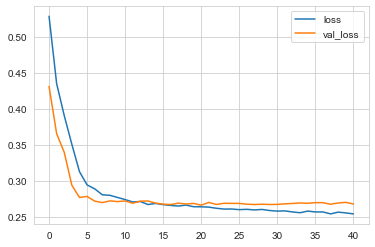

In [141]:
losses = pd.DataFrame(model.history.history)
losses.plot()

**Il callback early stopping ha terminato in anticipo il training del modello. Non si è raggiunto l'overfitting dato che le curve non sono risalite.**

Si fanno fare le previsioni al modello tra 0 e 1.

In [142]:
pred = (model.predict(X_test)>0.5)*1

372/372 [==============================] - 1s 2ms/step


## Performance del Modello

In [143]:
from sklearn.metrics import classification_report, confusion_matrix

In [146]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred)) 

[[1023 1336]
 [   0 9522]]


              precision    recall  f1-score   support

           0       1.00      0.43      0.60      2359
           1       0.88      1.00      0.93      9522

    accuracy                           0.89     11881
   macro avg       0.94      0.72      0.77     11881
weighted avg       0.90      0.89      0.87     11881



Text(0.5, 1.0, 'Confusion Matrix in percentuali')

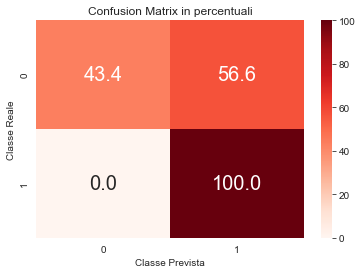

In [147]:
conf_mat = confusion_matrix(y_test,pred)
conf_mat = 100*(conf_mat.astype('float')/conf_mat.sum(axis=1)[:,np.newaxis])

sns.heatmap(conf_mat,annot=True,cmap='Reds',fmt='.1f',annot_kws={'size':20})
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Reale')
plt.title('Confusion Matrix in percentuali')

**Il modello ha performato bene, ma per la categoria 0, ovvero quella in cui il debito non verrà ripagato, non molto. La causa potrebbe essere attribuita allo sbilanciamento del dataset, si potrebbe migliorare andando a modificare vari parametri nel modello. Si ricorda però che la quantità da ottimizzare dipende sempre dal contesto.**

Si verifica che il modello abbia performato almeno meglio del "weighted guessing" e si proverà a vedere che riesca a prevedere se un nuovo borrower estinguerà il debito o meno. 

In [151]:
loan_sample = pd.DataFrame(data=y,columns=['loan_status'])

In [153]:
len(loan_sample)

39603

<AxesSubplot:xlabel='loan_status', ylabel='count'>

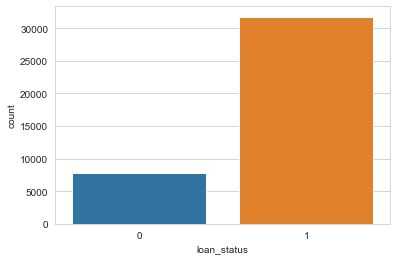

In [152]:
sns.countplot(data=loan_sample,x='loan_status')

In [149]:
print('Percentuale di prestiti estinti nel dataset:',round((loan['loan_status']==1).sum()/len(loan)*100,ndigits=1))
print('Percentuale di prestiti non estinti nel dataset:',round((loan['loan_status']==0).sum()/len(loan)*100,ndigits=1))

Percentuale di prestiti estinti nel dataset: 80.3
Percentuale di prestiti non estinti nel dataset: 19.7


**Effettivamente il modello performa meglio di una weighted guess in entrambe le categorie, ma per la categoria 0 si fa peggio di un random guess.**

Si "genera" un nuovo borrower.

In [154]:
import random
random.seed(101)
random_ind = random.randint(0,len(loan))

new_customer = loan.drop('loan_status',axis=1).iloc[random_ind]
new_customer

loan_amnt       2000.00
int_rate           7.90
installment       62.59
annual_inc     20400.00
dti               25.88
                 ...   
30723              0.00
48052              0.00
70466              0.00
86630              1.00
93700              0.00
Name: 87921, Length: 77, dtype: float64

In [155]:
(model.predict(scaler.transform(new_customer.values.reshape(1,77)))>0.5)*1

1/1 [==============================] - 4s 4s/step


array([[0]])

In [156]:
loan.iloc[random_ind]['loan_status'] 

0.0

**Il modello è riuscito, con un po' di fortuna, a predire correttamente che questo nuovo borrower non estinguerà il debito.**

E così si conclude il progetto portfolio sul Deep Learning, in cui si sono trattati Missing Data, si è fatto un po' di feature engineering e si è costruita una rete neurale densa con early stopping callback e dropout layers per evitare l'overfitting. 